# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Dataset

In [8]:
california_housing = fetch_california_housing(as_frame=True)
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [9]:
housing = california_housing.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# Analyze Data

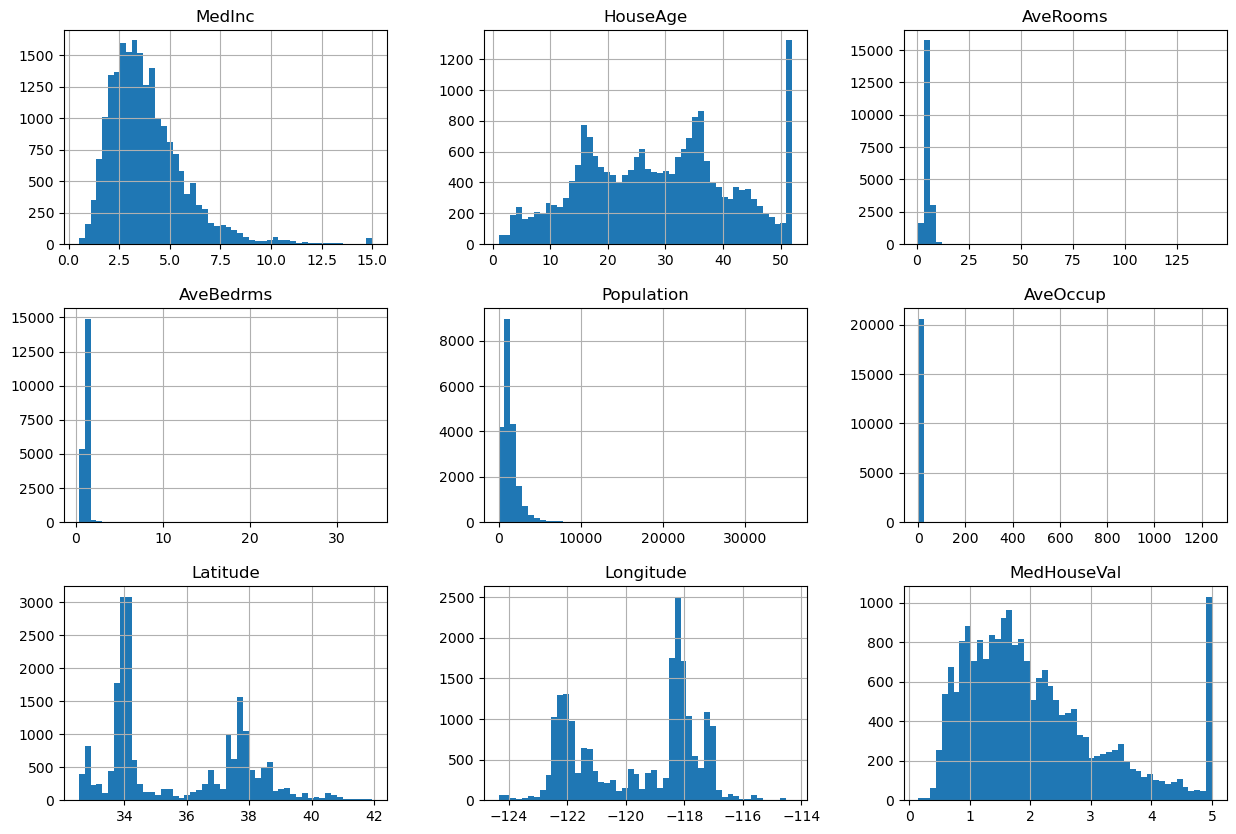

In [12]:

housing.hist(bins=50, figsize=(15, 10))
plt.show()

<Axes: >

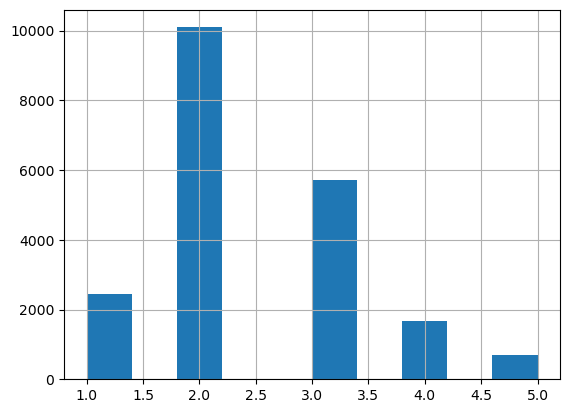

In [13]:
housing['CatInc'] = pd.cut(housing['MedInc'],
                          bins=[0., 2., 4., 6., 8., np.inf],
                          labels=[1, 2, 3, 4, 5])
housing['CatInc'].hist()

In [14]:
train_set, test_set = train_test_split(housing,
                                       test_size=0.2,
                                       random_state=42,
                                       stratify=housing['CatInc'])

In [15]:
train_set['CatInc'].value_counts() / len(train_set), test_set['CatInc'].value_counts() / len(test_set)

(CatInc
 2    0.489159
 3    0.277374
 1    0.119004
 4    0.081032
 5    0.033430
 Name: count, dtype: float64,
 CatInc
 2    0.489099
 3    0.277374
 1    0.119186
 4    0.080911
 5    0.033430
 Name: count, dtype: float64)

In [16]:
for set_ in (train_set, test_set):
    set_.drop('CatInc', axis=1, inplace=True)
housing.drop('CatInc', axis=1, inplace=True)

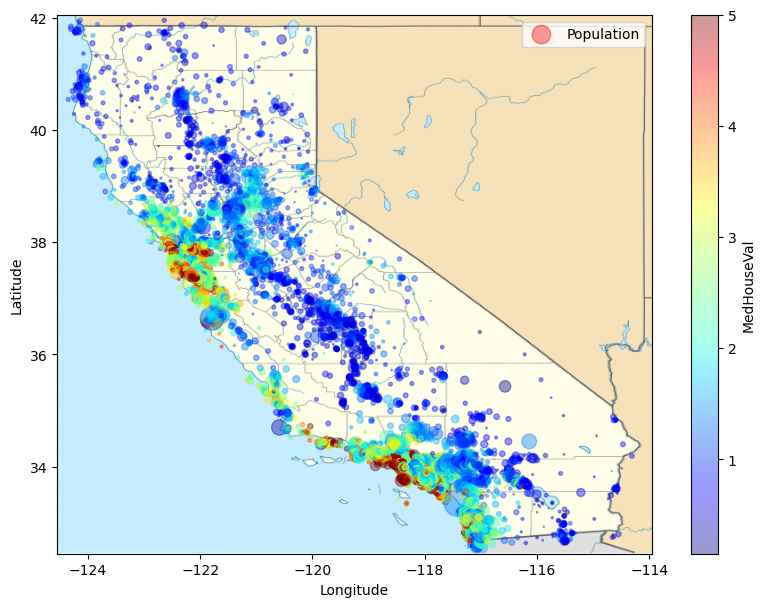

In [19]:
housing.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.4, s=housing['Population']/100,
            label='Population', figsize=(10, 7), c="MedHouseVal",
             cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
california_img = plt.imread('G:/myProjects/internship/task1/California.png')
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [20]:
corr_matrix = housing.corr()
corr_matrix['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

In [21]:
rooms_ix, bedrooms_ix, population_ix, household_ix = 2, 3, 4, 5
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X.iloc[:, rooms_ix] / X.iloc[:, household_ix]
        population_per_household = X.iloc[:, population_ix] / X.iloc[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X.iloc[:, bedrooms_ix] / X.iloc[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [22]:
pipeline_ = Pipeline([
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2))
])

In [23]:
X_train, X_test = train_set.drop('MedHouseVal', axis=1), test_set.drop('MedHouseVal', axis=1)
y_train, y_test = train_set['MedHouseVal'], test_set['MedHouseVal']

In [24]:
X_train = pipeline_.fit_transform(X_train)
X_test = pipeline_.transform(X_test)

# Model and Train

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
scores = cross_val_score(model, X_test, y_test, verbose=1, cv=6, scoring='neg_mean_absolute_error')

In [28]:
print(f'MAE mean is : {np.mean(-scores)} , MAE std is : {np.std(-scores)}')

MAE mean is : 0.5328618933498314 , MAE std is : 0.18831256141370034
